# 自然言語処理 100本ノック

## 自然言語とは
英語や日本語の様に人間が自然発生的に使用してきた言語の事を自然言語処理といいます。<br>
これに対し、プログラミング言語のような人工言語は形式言語と呼んで区別されます。<br>
自然言語 <-> 形式言語

## 自然言語処理とは

自然言語を計算機(コンピューター)で処理する事を指します。
計算機で処理を行う場合、言葉を計算機が計算しやすい様に、数値に変換する必要があります。
画像や音声の場合は、ピクセル数や音の高さ等で表現(数値化)することができます。
それに対して、自然言語の場合は、目的によって最適な表現方法(数値化)が異なる為、数値化が難しいとされています。
簡単な方法としては、単語をあるなし(0, 1)で数値化する方法があります。
これでは、単語ごとの意味が加味されていませんので、現在は、単語や文章の特徴を数値化して計算機で計算を行うことが主流となっています。
具体的な特徴として、文章に出現する単語の頻出頻度や近年は単語同士の関連性が使用されており、また、特徴量の算出方法(アルゴリズム)も複数存在し、目的によって最適な方法が複数取られています。

## 自然言語処理の活用

自然言語処理と機械学習を組み合わせることで、一例として以下のような事(用語としてはタスクといいます)がこなせます。

- 文章分類
- 自動要約
- 機械翻訳
- 文章生成
- 著者推定
- 自動ダグ生成

## 自然言語処理の基本的な流れ
自然言語を計算機で処理する際の基本的な流れは以下のようなものです。
ここでは、日本語に対しての処理の流れを説明します。

形態素解析
形態素解析器を使用して文を最小単位に分割する。また、各単語を品詞区分に紐付ける。
今日はいい天気 -> "今日", "は", "いい", "天気"
"今日": 名詞, "は": 助詞, "いい": 形容詞, "天気":名詞
構文解析
形態素解析を行った単語同士の関係性を解析する
詳細(自然言語（日本語）処理)
意味解析
構文解析をした結果、複数の候補がある場合、意味が伝わる構文を選択する
詳細(自然言語（日本語）処理)
文脈解析
複数の文章にまたがる構文解析+意味解析を行う
近年は、(特に英語ですが)形態素解析を行い、その単語をベクトル化(数値化)するだけで様々なタスクでよい精度が出ています。

## 以下スライドによる解説

![](utils/自然言語処理/Slide1.jpg)
![](utils/自然言語処理/Slide4.jpg)
![](utils/自然言語処理/Slide5.jpg)
![](utils/自然言語処理/Slide6.jpg)
![](utils/自然言語処理/Slide7.jpg)
![](utils/自然言語処理/Slide8.jpg)
![](utils/自然言語処理/Slide9.jpg)
![](utils/自然言語処理/Slide10.jpg)
![](utils/自然言語処理/Slide11.jpg)
![](utils/自然言語処理/Slide12.jpg)
![](utils/自然言語処理/Slide13.jpg)
![](utils/自然言語処理/Slide14.jpg)
![](utils/自然言語処理/Slide15.jpg)
![](utils/自然言語処理/Slide16.jpg)
![](utils/自然言語処理/Slide17.jpg)
![](utils/自然言語処理/Slide18.jpg)
![](utils/自然言語処理/Slide28.jpg)
![](utils/自然言語処理/Slide29.jpg)
![](utils/自然言語処理/Slide30.jpg)
![](utils/自然言語処理/Slide31.jpg)
![](utils/自然言語処理/Slide32.jpg)
![](utils/自然言語処理/Slide33.jpg)
![](utils/自然言語処理/Slide34.jpg)

本項では自然言語処理の基礎知識と応用について体験してもらいます。

## 1. Python正規表現の基本

Pythonではパッケージreを使って正規表現の実装します。

In [ ]:
import re

### 1.1 関数を直接使用

re.matchやre.subなどの関数を使います。

In [ ]:
# 第1引数が正規表現パターン(検索語句)、第2引数が検索対象
result = re.match('Hel', 'Hellow python')

print(result)
# <_sre.SRE_Match object; span=(0, 3), match='Hel'>

print(result.group())
# Hel

### 1.2 コンパイルして使用

正規表現パターンをコンパイルした後にmatchやsubなどの関数を使用します。

In [ ]:
# あらかじめ正規表現パターンをコンパイル
regex = re.compile('Hel')

result = regex.match('Hellow python')

print(result)
# <_sre.SRE_Match object; span=(0, 3), match='Hel'>

print(result.group())
# Hel

2種類の使い分け
複数の正規表現パターンを何度も使う場合はコンパイル方式を使います。

>re.compile() を使い、結果の正規表現オブジェクトを保存して再利用するほうが、一つのプログラムでその表現を何回も使うときに効率的です。
re.compile() やモジュールレベルのマッチング関数に渡された最新のパターンはコンパイル済みのものがキャッシュされるので、一度に正規表現を少ししか使わないプログラムでは正規表現をコンパイルする必要はありません。

## 2. 正規表現パターン(検索語句)の定義

### 2.1 raw文字列でエスケープシーケンス無効

raw文字列(raw string)は正規表現固有のトピックではありませんが、使うことでエスケープシーケンスを無効にできます。

In [ ]:
print('a\tb\nA\tB')
print(r'a\tb\nA\tB')

正規表現パターン内でバックスラッシュなどに対してエスケープシーケンスを書きたくないのでraw文字列を使います

In [ ]:
result = re.match(r'\d', '329')
result

### 2.2 トリプルクォートとre.VERBOSEで改行・コメント・空白無視

'''トリプルクォート("""でも可能)で囲むことにより、正規表現パターン中に改行を使うことができます(改行がなくても問題なし)。
re.VERBOSEを渡すことで、空白やコメントを正規表現パターンから除外できます。
リプルクォートとre.VERBOSEで非常に読みやすくなります
以下のような正規表現パターンを記述すると見やすいです。

In [ ]:
a = re.compile(r'''\d +  # the integral part
                   \.    # the decimal point
                   \d *  # some fractional digits''', re.VERBOSE)

トリプルクォートに関しては、記事「Pythonで文字列生成（引用符、strコンストラクタ）」に詳しくかかれています。

ちなみにcompileのパラメータflagsで複数のコンパイルフラグを使いたい場合は、単純に+(加算)してやればOKです。

In [ ]:
a = re.compile(r'''\d''', re.VERBOSE+re.MULTILINE)
a

### 2.3 OR条件（文字単体）

文字列の一部で、いずれかにヒットするみたいなOR条件的なパターンを使うには[]の括弧を利用します（文字の集合といった具合に呼ばれます。英語だとcharacter classなど）。

例えば、「特定の文字部分が猫もしくは犬のどちらかにヒットする」といった条件のパターンは以下のように設定できます。

In [ ]:
re.search(
    pattern=r'吾輩は[猫犬]である。',
    string='吾輩は猫である。名前はまだ無い。')

In [ ]:
re.search(
    pattern=r'吾輩は[猫犬]である。',
    string='吾輩は犬である。名前はまだ無い。')

In [ ]:
re.search(
    pattern=r'吾輩は[猫犬]である。',
    string='吾輩は兎である。名前はまだ無い。')

In [ ]:
re.search(
    pattern=r'吾輩は[猫犬兎]である。',
    string='吾輩は兎である。名前はまだ無い。')

### 2.4 OR条件（文字列）

先ほどは[]の括弧を使って文字単体のOR条件を試しました。文字単体ではなく文字列のOR条件を設定したい場合は条件の範囲を()の括弧で囲み、文字列間に|を挟みます（英語だとAlternation）。

例えば、猫であると犬だよという文字列でOR条件を設定したい場合には以下のような書き方になります。猫犬両方の文字列でヒットします。

In [ ]:
re.search(
    pattern=r'吾輩は(猫である|犬だよ)。',
    string='吾輩は猫である。名前はまだ無い。')

In [ ]:

re.search(
    pattern=r'吾輩は(猫である|犬だよ)。',
    string='吾輩は犬だよ。名前はまだ無い。')

In [ ]:
re.search(
    pattern=r'吾輩は(猫である|犬だよ|兎です)。',
    string='吾輩は兎です。名前はまだ無い。')

### 2.6 特殊文字
| 文字 | 説明　| 備考 | 例 | マッチする| マッチしない | 
|------|-------|------|-----|---------|----------|
|\d	|数字	|[0-9]と同じ| | | 
| \D	|数字以外	|[^0-9]と同じ|||
|\s |	空白文字	|[\t\n\r\f\v]と同じ|||			
|\S	|空白文字以外	|[^\t\n\r\f\v]と同じ|||			
|\w	|英数文字と下線	|[a-zA-Z0-9_]と同じ			
|\W	|英数文字以外	|[\a-zA-Z0-9_]と同じ			
|\A	|文字列の先頭	|^と類似			
|\Z	|文字列の末尾	|$と類似			
|\b	|単語の境界(スペース)				
|.	|任意の一文字	|-|	1.3|	123, 133|	1223|
|^	|文字列の先頭	|-|	^123|	1234|	0123|
|$	|文字列の末尾	|-|	123$|	0123|	1234|
|*	|０回以上の繰り返し	|-|	12*|	1, 12, 122	|11, 22
|+	|１回以上の繰り返し	|-|	12+	|12, 122	|1, 11, 22
|?	|０回または１回	|-|	12? |1, 12|	122|
|{m}	|m回の繰り返し|	-|	1{3}|	111	|11, 1111|
|{m,n}	|m〜n回の繰り返し	|-	|1{2, 3}	|11, 111	|1, 1111|
|[]	|集合	|[^5]とすると5以外	|[1-3]	|1, 2, 3	|4, 5|
| &#124; |	和集合(or)	|-	|1&#124;2	|1, 2	|3|
|()	|グループ化	|-|	(12)+|	|12, 1212	|1, 123|


### 3. マッチ関数

以下の関数をよく使います。

|関数	|目的|
|----|-----|
|match	|文字列の先頭で正規表現とマッチするか判定|
|search	|正規表現がどこにマッチするか検索|
|findall|マッチする部分文字列を全て探しリストとして返します|
|sub	|文字列置換|

### 3.1 matchとsearch
文字列の先頭でのみのマッチするのがre.matchで文字列中の位置にかかわらずマッチするのがre.search。詳しくは公式の「search() vs. match()」を参照。両者とも最初のパターンのみを返します(2回目以降にマッチしたものを返さない)。

In [ ]:
re.match("c", "abcdef")    # 先頭が"c"でないのでマッチしない

In [ ]:
re.search("c", "abcdef")   # マッチする

結果はgroupに入っています。group(0)に結果がすべて入っていて、グループ化した検索結果は連番で1から入っています。

In [ ]:
 m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")

In [ ]:
 m.group(0)       # The entire match

In [ ]:
m.group(1)       # The first parenthesized subgroup.

In [ ]:
m.group(2)       # The second parenthesized subgroup.

In [ ]:
 m.group(1, 2)    # Multiple arguments give us a tuple.

### 3.2 findall 
パターンにマッチした全ての文字列をリスト形式で返すのがfindall。

In [ ]:
text = "He was carefully disguised but captured quickly by police."
re.findall(r"\w+ly", text)

()を使ってキャプチャ対象を指定できますが、複数指定した場合は以下のようになります。グループごとにタプルで返ってきます。

In [ ]:
print(re.findall(r'''(1st)(2nd)''', '1st2nd1st2nd'))

### 3.3 sub

文字置換をします。引数の順に1. 正規表現パターン、2. 置換後の文字列、3. 置換対象文字列です。

In [ ]:
 re.sub(r'置換前', '置換後', '置換前 対象外 置換前')

## 4.　形態素解析

### 4.1 形態素解析とは 

形態素解析とは、コンピュータを利用して機械的な方法で文を形態素（言葉で意味を持つ最小の単位）に区切る技術のことを言います。

我々の身近な言語としては、日本語、英語があります。

この２つの言語は、当然ですが、使用する言葉と文法が異なります。

例えば、日本語で「これはペンです。」という文は、英語だと「This is a pen.」です。

英語は、”This”, “is”, “a”, “pen”という風に、単語と単語の間に空白が存在しますが、日本語は単語と単語の間に空白が存在しません。

このように、単語と単語の間に空白を入れる書き方を分かち書きといいます。

そして、分かち書きされていない日本語の文章を機械に理解させるためには、単語分割を行うとともに品詞を明確にする必要があるのです。

なぜなら文章は、決められた文法法則に従い単語に付与されている品詞を並べて構成されているからです。

機械に対して、単語の意味、品詞、文法を理解させなければ意味を解釈させることもできなければ、文を作成させることもできません。

### 4.2 形態素解析ツール

日本語の主な形態素解析ツールには以下のようなものがあります。

・MeCab
・ChaSen
・JUMAN
・Janome

### 4.3 形態素解析の実装 | MeCab

In [ ]:
!pip install mecab-python3

以下のような出力が得られたら成功です。


Collecting mecab-python3
  Downloading https://files.pythonhosted.org/packages/c1/72/20f8f60b858556fdff6c0376b480c230e594621fff8be780603ac9c47f6a/mecab_python3-1.0.3-cp37-cp37m-manylinux1_x86_64.whl (487kB)
     |████████████████████████████████| 491kB 8.6MB/s 
Installing collected packages: mecab-python3
Successfully installed mecab-python3-1.0.3

次に、辞書データとしてUniDicをインストールします。
UniDicは国立国語研究所が開発している辞書です。
以下を入力し実行してください。

In [ ]:
!pip install unidic

以下のような出力が得られたら成功です。
Collecting unidic
  Downloading https://files.pythonhosted.org/packages/86/04/c18832fd9959a78fc60eeaa9e7fb37ef31a250e8645cc2897eb1f07939ee/unidic-1.0.3.tar.gz
Requirement already satisfied: requests<3.0.0,>=2.22.0 in /usr/local/lib/python3.7/dist-packages (from unidic) (2.23.0)
Requirement already satisfied: tqdm<5.0.0,>=4.41.1 in /usr/local/lib/python3.7/dist-packages (from unidic) (4.41.1)
Requirement already satisfied: wasabi<1.0.0,>=0.6.0 in /usr/local/lib/python3.7/dist-packages (from unidic) (0.8.2)
Requirement already satisfied: plac<2.0.0,>=1.1.3 in /usr/local/lib/python3.7/dist-packages (from unidic) (1.1.3)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /usr/local/lib/python3.7/dist-packages (from requests<3.0.0,>=2.22.0->unidic) (1.24.3)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.7/dist-packages (from requests<3.0.0,>=2.22.0->unidic) (2020.12.5)
Requirement already satisfied: idna<3,>=2.5 in /usr/local/lib/python3.7/dist-packages (from requests<3.0.0,>=2.22.0->unidic) (2.10)
Requirement already satisfied: chardet<4,>=3.0.2 in /usr/local/lib/python3.7/dist-packages (from requests<3.0.0,>=2.22.0->unidic) (3.0.4)
Building wheels for collected packages: unidic
  Building wheel for unidic (setup.py) ... done
  Created wheel for unidic: filename=unidic-1.0.3-cp37-none-any.whl size=5497 sha256=78ab4afc1982544644d7782dac00a36b55b71aceeb11cb7d0d692f01bd995f10
  Stored in directory: /root/.cache/pip/wheels/d3/26/e2/fb76c79fd14391eb994eab021c9129c24814125298e1e5b96a
Successfully built unidic
Installing collected packages: unidic
Successfully installed unidic-1.0.3

更に、辞書データもダウンロードします。

以下のコードを実行しましょう。

In [ ]:
!python -m unidic download

以下のような出力が得られたら成功です。
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic.zip
Dictionary version: 2.3.0+2020-10-08
Downloading UniDic v2.3.0+2020-10-08...
unidic.zip: 100% 608M/608M [00:22<00:00, 27.3MB/s]
Finished download.
Downloaded UniDic v2.3.0+2020-10-08 to /usr/local/lib/python3.7/dist-packag

### 4.4 「私は形態素解析を学んでいます」という文章を解析します。

In [ ]:
import MeCab
import unidic
mecab = MeCab.Tagger()
print(mecab.parse("私は形態素解析を学んでいます。"))

出力された内容を確認しましょう。出力される形態素解析の結果は、左から順に以下の通りとなります。

表層形（surface）（文章中で使用されている単語）
品詞（part_of_speech）
品詞細分類1〜3（part_of_speech）
活用型（infl_type）
活用形（infl_form）
原形（base_form）（文章中で使用されている単語の原形）
読み（reading）
発音（phonetic）

### 4.5 MeCabを用いて分かち書きをしたい場合

分かち書きをしたい場合は、Tagger()オブジェクトの出力モードに('-Owakati')を指定すればOKです。

('-Owakati')を指定することで、品詞などを付与せず、形態素ごとに区切りの空白を入れることができます。



In [ ]:
import MeCab
import unidic
mecab = MeCab.Tagger('-Owakati')
print(mecab.parse("私は形態素解析を学んでいます。"))

Tagger()オブジェクトの出力モードには、以下も指定できます。

- Oyomi: 読みのみを出力
- Ochasen: ChaSen互換形式
- Odump: 全ての情報を出力

実行したい処理に応じて使い分けましょう。



### 4.6 形態素解析の実装 | Janome

まずは、janomeをインストールしましょう。Google Colaboratoryのセルに以下を入力し実行すればOKです。

In [ ]:
!pip install janome

以下のような出力が得られれば成功です。
Collecting janome
  Downloading https://files.pythonhosted.org/packages/a8/63/98858cbead27df7536c7e300c169da0999e9704d02220dc6700b804eeff0/Janome-0.4.1-py2.py3-none-any.whl (19.7MB)
     |████████████████████████████████| 19.7MB 50.0MB/s 
Installing collected packages: janome
Successfully installed janome-0.4.1

#### 4.7 janomeを使った形態素解析

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = t.tokenize("私は形態素解析を学んでいます。")
for token in tokens:
  print(token)

出力された内容は、MeCabと同様に、左から順に以下の通りとなります。

表層形（surface）（文章中で使用されている単語）
品詞（part_of_speech）
品詞細分類1〜3（part_of_speech）
活用型（infl_type）
活用形（infl_form）
原形（base_form）（文章中で使用されている単語の原形）
読み（reading）
発音（phonetic）

### 4.8 Janomeを用いて分かち書きをしたい場合

Janomeで分かち書きをしたい場合は、tokenize()メソッドの引数にwakati=Trueを指定すると、分かち書きのみを行います。

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = t.tokenize("私は形態素解析を学んでいます。", wakati=True)
for token in tokens:
  print(token)

### 4.9　テキストファイルを読み込んで形態素解析を行う

In [ ]:
filename = 'data/wagahaiwa_nekodearu.txt'
sentences = []

tagger = MeCab.Tagger("-Owakati")
morphs = []
with open(filename, mode='r', encoding="ShiftJIS") as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = line.split('\t')
      sentences.append(tagger.parse(fields[0]))
sentences[:4]

## 5 スクレイピングで青空文庫からデータを取得してみる


今回はスクレイピングで青空文庫からデータを取得をしてみます。
### Webスクレイピングとは
Webスクレイピングとは、Webページから情報を取得することを指します。Pythonを用いることで、取得だけでなく、取得した情報をExcelやGoogleスプレッドシートなどに整理し、利用できるようにすることも可能です。
WebスクレイピングをするにはPythonとWebの基礎知識が必要になりますが、決して難しいものではありません。原理を理解することで、自分で使いやすいシステムを構築することができます。

- Pythonで使えるWebスクレイピングのライブラリ<br>
    PythonにはWebスクレイピングに使えるライブラリが用意されています。今回は代表的な3つのライブラリについて紹介していきます。
- BeautifulSoup<br>
    HTMLやXMLからデータを引き出せるライブラリです。Pythonでクローラーを作成する際によく使用されるライブラリですが、BeautifulSoup単体ではスクレイピングはできないため、HTTP通信ができるモジュールやCSVにエクスポートする他のライブラリと組み合わせて使用します。
- Scrapy<br>
    クローラーを実装・運用するために必要となる機能を持つ、アプリケーション全体を実装するためのフレームワークです。Webスクレイピング用に設計されましたが、APIを使用したデータ抽出や汎用クローラーとして使用することも可能です。
- Selenium<br>
    Webブラウザの操作を自動化するフレームワークです。本来はWebアプリケーションのUIテストを自動化するために開発されましたが、ブラウザの操作をコードで記述して自動化できる利便性の高さからタスクやWebサイトのクローリングなどに転用されています。



### Webスクレイピングの注意点

Webスクレイピングは、情報を収集するためにWebサイトに頻繁にアクセスします。アクセスする頻度によっては、Webサイトが設置されているサーバに大きな負荷をかけ、他のユーザーがアクセスしにくくなったり、サーバがダウンしてしまう、いわゆるDOS攻撃（Denial-of-service attack）になってしまうケースもあります。

for分やwhile文で情報を取得することは禁止します。

Webスクレイピングをおこなう際には、DOS攻撃にならないよう注意し、アクセスする間隔や頻度を調整するように気を付けましょう。悪意の有無に関わらず、DOS攻撃はサーバ負荷が大きく、アクセス先のWebサイトが設置されているサーバが共有の場合、最悪のケースでは他のユーザーを保護するためサイトがサーバから削除されることもあります。


あくまで収集する情報を提供してもらっているという意識を忘れず、相手に迷惑をかけないプログラミングを心がけましょう。

### 5.1 PythonでWebスクレイピング
#### urllib.requestを利用したWebスクレイピング
PythonにはURLを扱うためのモジュールとして、いくつかのモジュールをまとめたurllibモジュールパッケージが標準で付属しています。今回はこの標準モジュールのうち、urllib.reguestモジュールを利用してWebスクレイピングをおこないます。

In [ ]:
from urllib import request
response = request.urlopen('https://www.aozora.gr.jp/index.html')
content = response.read()
response.close()
html = content.decode()

title = html.split('<title>')[1].split('</title')[0]
print(title)

まずurllib.request.urlopen関数でURLをオープンします。この関数でURLをオープンすると、サーバからはhttp.clientモジュールで定義されているHTTPResponseクラスのオブジェクトが返送されます。
続いてreadメソッドを使用してWebページの内容（ソースコード）を取得し、URLをクローズします。
ここまでの操作で取得したページの内容はbytesオブジェクト（バイト列）になっているため、decodeメソッドで文字列（str）にデコードします。
最後に、文字列として取得できたデータから、今回はタイトルタグを取得するため、文字列操作でタイトルタグを検索して取得し、出力します。

#### BeautifulSoupを使用したWebスクレイピング
ここからは、BeautifulSoupを使用したWebスクレイピングのサンプルコードを見ていきましょう。BeautifulSoupを使用すると、標準のurllibモジュールを使用するよりも簡潔なコードでWebスクレイピングを構築できます。

前項で解説したとおり、BeautifulSoupは単体ではHTTPへの通信機能を持たないため、別のライブラリやパッケージと組み合わせて使用します。今回は「requests」というリクエスト用のパッケージを読み込み、URLを渡すことでWebページを読み込みます。

まずrequestsとBeautifulSoupのライブラリをインポートします。続いて今回取得したいWebサイトのURLをrequestsのgetメソッドで展開してコンテンツを取得します。

取得したコンテンツをresponseに格納してBeautifulSoupに渡し、responseの内容を解析します。最後に解析した内容をfindメソッドで検索して、get_textでテキストを取得し、出力します。

In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.aozora.gr.jp/index.html')
soup = BeautifulSoup(response.content, 'html.parser')
title = soup.find('title').get_text()
print(title)

青空文庫　Aozora Bunko


### 5.2 小説のデータを抽出してみる

データの取得にはBeautiful Soup 4を使います。まずは夏目漱石の小説を幾つか取得するコードを完成させていきましょう。
[リンク](https://www.aozora.gr.jp/index_pages/person148.html)

![](./utils/natume_souseki.png)

今回は「こころ」を取得してみようと思います。国語の授業で読んだことがある人もいると思います。<br>
リンクをクリックすると、次のようなページが表示されます。<br>
![](./utils/kokoro.png)

取得可能なファイルの種類には3つありますが、ここでは［ファイル種別］が［XHTMLファイル］となっているファイルを取得することにします。<br>
このリンク（773_14560.html）をクリックすると以下のように作品が表示されます。<br>
![](./utils/こころ.png)

urllib.requestモジュールが提供するurlopen関数を使って、このページの内容を取得して、これをBeautiful Soup 4に入力すれば、さまざまな操作が可能なオブジェクトが手に入ります。
ここまでの処理を実際に行うのが、以下のコードです。

In [2]:
from bs4 import BeautifulSoup
from urllib import request

url = 'https://www.aozora.gr.jp/cards/000074/files/427_19793.html'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

print(soup)

<?xml version="1.0" encoding="Shift_JIS"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<link href="../../aozora.css" rel="stylesheet" type="text/css"/>
<title>梶井基次郎 桜の樹の下には</title>
<script src="../../jquery-1.4.2.min.js" type="text/javascript"></script>
<link href="http://purl.org/dc/elements/1.1/" rel="Schema.DC"/>
<meta content="桜の樹の下には" name="DC.Title"/>
<meta content="梶井基次郎" name="DC.Creator"/>
<meta content="青空文庫" name="DC.Publisher"/>
</head>
<body>
<div class="metadata">
<h1 class="title">桜の樹の下には</h1>
<h2 class="author">梶井基次郎</h2>
<br/>
<br/>
</div>
<div id="contents" style="display:none"></div><div class="main_text"><br/>
　桜の樹の下には<ruby><rb>屍体</rb><rp>（</rp><rt>したい</rt><rp>）</rp></ruby>が埋まっている！<br/>
　これは信じていいことなんだよ。<ruby><rb>何故</rb><rp>（<

文テキストだけではなく、さまざまなタグが含まれています。そこで、まずはdiv＞タグ（class属性が"main_text"）となっている部分だけを取り出しましょう。

In [3]:
main_text = soup.find('div', class_='main_text')
print(main_text)

<div class="main_text"><br/>
　桜の樹の下には<ruby><rb>屍体</rb><rp>（</rp><rt>したい</rt><rp>）</rp></ruby>が埋まっている！<br/>
　これは信じていいことなんだよ。<ruby><rb>何故</rb><rp>（</rp><rt>なぜ</rt><rp>）</rp></ruby>って、桜の花があんなにも見事に咲くなんて信じられないことじゃないか。俺はあの美しさが信じられないので、この二三日不安だった。しかしいま、やっとわかるときが来た。桜の樹の下には屍体が埋まっている。これは信じていいことだ。<br/>
<br/>
　どうして俺が毎晩家へ帰って来る道で、俺の部屋の数ある道具のうちの、<ruby><rb>選</rb><rp>（</rp><rt>よ</rt><rp>）</rp></ruby>りに選ってちっぽけな薄っぺらいもの、安全剃刀の刃なんぞが、千里眼のように思い浮かんで来るのか――おまえはそれがわからないと言ったが――そして俺にもやはりそれがわからないのだが――それもこれもやっぱり同じようなことにちがいない。<br/>
<br/>
　いったいどんな樹の花でも、いわゆる真っ盛りという状態に達すると、あたりの空気のなかへ一種神秘な雰囲気を撒き散らすものだ。それは、よく廻った<ruby><rb>独楽</rb><rp>（</rp><rt>こま</rt><rp>）</rp></ruby>が完全な静止に澄むように、また、音楽の上手な演奏がきまってなにかの幻覚を伴うように、<ruby><rb>灼熱</rb><rp>（</rp><rt>しゃくねつ</rt><rp>）</rp></ruby>した生殖の幻覚させる後光のようなものだ。それは人の心を<ruby><rb>撲</rb><rp>（</rp><rt>う</rt><rp>）</rp></ruby>たずにはおかない、不思議な、生き生きとした、美しさだ。<br/>
　しかし、昨日、一昨日、俺の心をひどく陰気にしたものもそれなのだ。俺にはその美しさがなにか信じられないもののような気がした。俺は反対に不安になり、<ruby><rb>憂鬱</rb><rp>（</rp><rt>ゆううつ</rt><rp>）</rp></ruby>になり、空虚な気持になった。しかし、俺はい

これで小説の本文テキストだけが得られましたが、気になるのは山ほど入っているルビ関連のタグです。手作業でこれらを削除していくのは大変ですが、実はfindメソッドで取得した本文テキスト（main_textオブジェクト）はBeautiful Soup 4のTagオブジェクトとなっていて、このオブジェクトにはdecomposeメソッドが用意されています。このメソッドは特定のタグとその内容を削除するのに使えます。そこで、上で取り出したmain_textでルビ関連のタグ（の一部）を削除してみましょう。

In [4]:
tags_to_delete = main_text.find_all(['rp', 'rt'])
for tag in tags_to_delete:
    tag.decompose()
print(main_text)

<div class="main_text"><br/>
　桜の樹の下には<ruby><rb>屍体</rb></ruby>が埋まっている！<br/>
　これは信じていいことなんだよ。<ruby><rb>何故</rb></ruby>って、桜の花があんなにも見事に咲くなんて信じられないことじゃないか。俺はあの美しさが信じられないので、この二三日不安だった。しかしいま、やっとわかるときが来た。桜の樹の下には屍体が埋まっている。これは信じていいことだ。<br/>
<br/>
　どうして俺が毎晩家へ帰って来る道で、俺の部屋の数ある道具のうちの、<ruby><rb>選</rb></ruby>りに選ってちっぽけな薄っぺらいもの、安全剃刀の刃なんぞが、千里眼のように思い浮かんで来るのか――おまえはそれがわからないと言ったが――そして俺にもやはりそれがわからないのだが――それもこれもやっぱり同じようなことにちがいない。<br/>
<br/>
　いったいどんな樹の花でも、いわゆる真っ盛りという状態に達すると、あたりの空気のなかへ一種神秘な雰囲気を撒き散らすものだ。それは、よく廻った<ruby><rb>独楽</rb></ruby>が完全な静止に澄むように、また、音楽の上手な演奏がきまってなにかの幻覚を伴うように、<ruby><rb>灼熱</rb></ruby>した生殖の幻覚させる後光のようなものだ。それは人の心を<ruby><rb>撲</rb></ruby>たずにはおかない、不思議な、生き生きとした、美しさだ。<br/>
　しかし、昨日、一昨日、俺の心をひどく陰気にしたものもそれなのだ。俺にはその美しさがなにか信じられないもののような気がした。俺は反対に不安になり、<ruby><rb>憂鬱</rb></ruby>になり、空虚な気持になった。しかし、俺はいまやっとわかった。<br/>
　おまえ、この<ruby><rb>爛漫</rb></ruby>と咲き乱れている桜の樹の下へ、一つ一つ屍体が埋まっていると想像してみるがいい。何が俺をそんなに不安にしていたかがおまえには納得がいくだろう。<br/>
　馬のような屍体、犬猫のような屍体、そして人間のような屍体、屍体はみな<ruby><rb>腐爛</rb></ruby>して<ruby><rb>蛆</rb></ruby>が湧き、<ruby><rb>堪

ここでは＜rp＞タグと＜rt＞タグの2つだけを削除の対象としています。それ以外はもちろん残ってしまうのですが、＜rb＞タグの内容は削除してしまっては困るもの（ルビを振る文字そのもの）ですから、これはそういうものだと思いましょう。＜ruby＞タグも同様で、これを削除してしまうとルビだけではなく、本文テキストの一部まで削除してしまいます。

タグもまだ残っています。これらはどうすればよいでしょう。Beautiful Soup 4のTagオブジェクトには「get_textメソッド」という便利なメソッドがあります。これは人が読めるようなテキストを抜き出すのに使えます（戻り値はBeautiful Soup 4のオブジェクトではなく、単なる文字列です）。実際に使ってみましょう。

In [5]:
main_text = main_text.get_text()
print(main_text)


　桜の樹の下には屍体が埋まっている！
　これは信じていいことなんだよ。何故って、桜の花があんなにも見事に咲くなんて信じられないことじゃないか。俺はあの美しさが信じられないので、この二三日不安だった。しかしいま、やっとわかるときが来た。桜の樹の下には屍体が埋まっている。これは信じていいことだ。

　どうして俺が毎晩家へ帰って来る道で、俺の部屋の数ある道具のうちの、選りに選ってちっぽけな薄っぺらいもの、安全剃刀の刃なんぞが、千里眼のように思い浮かんで来るのか――おまえはそれがわからないと言ったが――そして俺にもやはりそれがわからないのだが――それもこれもやっぱり同じようなことにちがいない。

　いったいどんな樹の花でも、いわゆる真っ盛りという状態に達すると、あたりの空気のなかへ一種神秘な雰囲気を撒き散らすものだ。それは、よく廻った独楽が完全な静止に澄むように、また、音楽の上手な演奏がきまってなにかの幻覚を伴うように、灼熱した生殖の幻覚させる後光のようなものだ。それは人の心を撲たずにはおかない、不思議な、生き生きとした、美しさだ。
　しかし、昨日、一昨日、俺の心をひどく陰気にしたものもそれなのだ。俺にはその美しさがなにか信じられないもののような気がした。俺は反対に不安になり、憂鬱になり、空虚な気持になった。しかし、俺はいまやっとわかった。
　おまえ、この爛漫と咲き乱れている桜の樹の下へ、一つ一つ屍体が埋まっていると想像してみるがいい。何が俺をそんなに不安にしていたかがおまえには納得がいくだろう。
　馬のような屍体、犬猫のような屍体、そして人間のような屍体、屍体はみな腐爛して蛆が湧き、堪らなく臭い。それでいて水晶のような液をたらたらとたらしている。桜の根は貪婪な蛸のように、それを抱きかかえ、いそぎんちゃくの食糸のような毛根を聚めて、その液体を吸っている。
　何があんな花弁を作り、何があんな蕊を作っているのか、俺は毛根の吸いあげる水晶のような液が、静かな行列を作って、維管束のなかを夢のようにあがってゆくのが見えるようだ。
　――おまえは何をそう苦しそうな顔をしているのだ。美しい透視術じゃないか。俺はいまようやく瞳を据えて桜の花が見られるようになったのだ。昨日、一昨日、俺を不安がらせた神秘から自由になったのだ。
　二三日前、俺は、ここの溪へ下りて、石の上を伝い歩きしていた。水

タグは消えますが、ルビの情報である「（したい）」などがテキスト中に含まれていることに注目してください。これらは全角かっこ「（）」に囲まれたひらがなですから、正規表現を使って「main_text = re.sub('（[\u3041-\u309F]+）', '', main_text)」のようなことをすることで削除可能です。が、本文テキストとしてこのような文字の並びが登場する可能性はゼロとはいいきれません。そこで、＜rp＞タグと＜rt＞タグという情報を手がかりとして、削除してもよいものを前もって処理しておくことにしました。

　ところで、先ほどの文章に「（見た目は）」とあるのに気が付いた方もいらっしゃるかもしれません。見た目とはどういうことでしょう。これはprint関数にmain_textを渡すのではなく、「main_text」とだけセルに入力して、Google Colab上で評価してみると分かります。

「\r」「\n」「\u3000」などの文字がmain_textオブジェクトに埋め込まれているのが分かります（最後の「\u3000」は全角空白文字のコードポイント）。これは文字列のreplaceメソッドを使って削除してしまいましょう。

In [6]:
main_text = main_text.replace('\r', '').replace('\n', '').replace('\u3000', '')
main_text

'桜の樹の下には屍体が埋まっている！これは信じていいことなんだよ。何故って、桜の花があんなにも見事に咲くなんて信じられないことじゃないか。俺はあの美しさが信じられないので、この二三日不安だった。しかしいま、やっとわかるときが来た。桜の樹の下には屍体が埋まっている。これは信じていいことだ。どうして俺が毎晩家へ帰って来る道で、俺の部屋の数ある道具のうちの、選りに選ってちっぽけな薄っぺらいもの、安全剃刀の刃なんぞが、千里眼のように思い浮かんで来るのか――おまえはそれがわからないと言ったが――そして俺にもやはりそれがわからないのだが――それもこれもやっぱり同じようなことにちがいない。いったいどんな樹の花でも、いわゆる真っ盛りという状態に達すると、あたりの空気のなかへ一種神秘な雰囲気を撒き散らすものだ。それは、よく廻った独楽が完全な静止に澄むように、また、音楽の上手な演奏がきまってなにかの幻覚を伴うように、灼熱した生殖の幻覚させる後光のようなものだ。それは人の心を撲たずにはおかない、不思議な、生き生きとした、美しさだ。しかし、昨日、一昨日、俺の心をひどく陰気にしたものもそれなのだ。俺にはその美しさがなにか信じられないもののような気がした。俺は反対に不安になり、憂鬱になり、空虚な気持になった。しかし、俺はいまやっとわかった。おまえ、この爛漫と咲き乱れている桜の樹の下へ、一つ一つ屍体が埋まっていると想像してみるがいい。何が俺をそんなに不安にしていたかがおまえには納得がいくだろう。馬のような屍体、犬猫のような屍体、そして人間のような屍体、屍体はみな腐爛して蛆が湧き、堪らなく臭い。それでいて水晶のような液をたらたらとたらしている。桜の根は貪婪な蛸のように、それを抱きかかえ、いそぎんちゃくの食糸のような毛根を聚めて、その液体を吸っている。何があんな花弁を作り、何があんな蕊を作っているのか、俺は毛根の吸いあげる水晶のような液が、静かな行列を作って、維管束のなかを夢のようにあがってゆくのが見えるようだ。――おまえは何をそう苦しそうな顔をしているのだ。美しい透視術じゃないか。俺はいまようやく瞳を据えて桜の花が見られるようになったのだ。昨日、一昨日、俺を不安がらせた神秘から自由になったのだ。二三日前、俺は、ここの溪へ下りて、石の上を伝い歩きしていた。水のしぶきのなかからは、あちらからもこちらか

最後にエクスクラメーションマーク「！」と句点「。」の直後に改行を含めるようにします。これで1文ごとに改行されるようになります。といっても、そうしたいのではなく、最後にこれをsplitlinesメソッドで個々の文を要素とするリストを作成しておくためです

In [7]:
import re

main_text = re.sub('([！。])', r'\1\n', main_text)  # 。と！で改行
text_list = main_text.splitlines()
print(text_list)

['桜の樹の下には屍体が埋まっている！', 'これは信じていいことなんだよ。', '何故って、桜の花があんなにも見事に咲くなんて信じられないことじゃないか。', '俺はあの美しさが信じられないので、この二三日不安だった。', 'しかしいま、やっとわかるときが来た。', '桜の樹の下には屍体が埋まっている。', 'これは信じていいことだ。', 'どうして俺が毎晩家へ帰って来る道で、俺の部屋の数ある道具のうちの、選りに選ってちっぽけな薄っぺらいもの、安全剃刀の刃なんぞが、千里眼のように思い浮かんで来るのか――おまえはそれがわからないと言ったが――そして俺にもやはりそれがわからないのだが――それもこれもやっぱり同じようなことにちがいない。', 'いったいどんな樹の花でも、いわゆる真っ盛りという状態に達すると、あたりの空気のなかへ一種神秘な雰囲気を撒き散らすものだ。', 'それは、よく廻った独楽が完全な静止に澄むように、また、音楽の上手な演奏がきまってなにかの幻覚を伴うように、灼熱した生殖の幻覚させる後光のようなものだ。', 'それは人の心を撲たずにはおかない、不思議な、生き生きとした、美しさだ。', 'しかし、昨日、一昨日、俺の心をひどく陰気にしたものもそれなのだ。', '俺にはその美しさがなにか信じられないもののような気がした。', '俺は反対に不安になり、憂鬱になり、空虚な気持になった。', 'しかし、俺はいまやっとわかった。', 'おまえ、この爛漫と咲き乱れている桜の樹の下へ、一つ一つ屍体が埋まっていると想像してみるがいい。', '何が俺をそんなに不安にしていたかがおまえには納得がいくだろう。', '馬のような屍体、犬猫のような屍体、そして人間のような屍体、屍体はみな腐爛して蛆が湧き、堪らなく臭い。', 'それでいて水晶のような液をたらたらとたらしている。', '桜の根は貪婪な蛸のように、それを抱きかかえ、いそぎんちゃくの食糸のような毛根を聚めて、その液体を吸っている。', '何があんな花弁を作り、何があんな蕊を作っているのか、俺は毛根の吸いあげる水晶のような液が、静かな行列を作って、維管束のなかを夢のようにあがってゆくのが見えるようだ。', '――おまえは何をそう苦しそうな顔をしているのだ。', '美しい透視術じゃないか。', '俺はいまようやく瞳を据えて桜の花が

関数にしておく

In [8]:
from bs4 import BeautifulSoup
from urllib import request
import re

def get_url_text(url=None):
    if url == None:
        return [""]
    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()
    main_text = soup.find('div', class_='main_text')
    main_text = main_text.get_text()
    main_text = main_text.replace('\r', '').replace('\n', '').replace('\u3000', '')
    main_text = re.sub('([！。])', r'\1\n', main_text)  # 。と！で改行
    text_list = main_text.splitlines()
    return text_list

### 5.3 Wordcloudを用いた形態素解析

### WordCloudとは
![](./utils/word_cloud.png)

ニュースでこんなグラフをみたことはありませんか？

WordCloudは、文章中で出現頻度が高い単語を複数選び出し、その頻度に応じた大きさで図示する手法。ウェブページやブログなどに頻出する単語を自動的に並べることなどを指す。文字の大きさだけでなく、色、字体、向きに変化をつけることで、文章の内容をひと目で印象づけることができる。(デジタル大辞泉の解説より)

wordcloudで文字の出現頻度を可視化する方法を実装してみます。


wordcloudはデフォルトでは日本語に対応していないので、適当な日本語フォントを読み込ませる必要があります。
また、Google Colab には日本語の True Font が入っていないので、インストールします。このコマンドをコピペして実行します。
!apt-get -y install fonts-ipafont-gothic

In [9]:
text_list = get_url_text(url="https://www.aozora.gr.jp/cards/000148/files/773_14560.html")

In [10]:
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

Janome で単語単位に分割し、必要な単語だけ抜き出し、Word Cloud を実行します。
単語単位に分割し、名詞（但し、非自立・代名詞・数を除く）のみを対象に抜き出し、words_wakati （単語が空白で区切られ改行コードはない状態）に保存します

In [11]:
t = Tokenizer()
tokens = t.tokenize("".join(text_list))
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
     
    word_list.append(word)
 
words_wakati=" ".join(word_list)

コードをみて頂ければ分かると思います。参考に、# default 値を記載してあります。

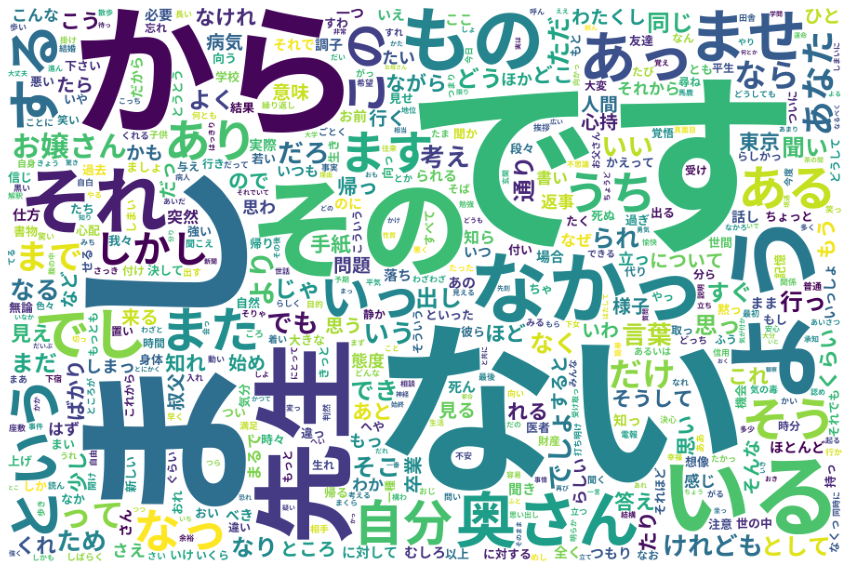

In [12]:
fpath = './utils/GenShinGothic-Bold.ttf'  # 日本語フォント指
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    max_words=500,   # default=200
    min_font_size=4,   #default=4
    collocations = False   #default = True
    ).generate(words_wakati)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 表示させたくない単語の削除


上記のワードクラウドを見ると、「する」「いる」のような、「そりゃ沢山使われるよね」という単語がデカデカと表示されています。
そういった、「消したい単語」は、単語を連結する際に省いておく必要があります。

具体的には、以下のように、単語が指定した語句一覧に含まれていたら文字列連結をやめる処理にすればOKです。

In [13]:
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
    if word not in ["それ", "ない", "する", "いる"]:
        word_list.append(word)

また特定の品詞のみを使用することもできます。

In [14]:
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
    if partOfSpeech == "名詞":
       if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
            word_list.append(word)

### 5.4 WordCloud作成+画像でマスク処理
mask画像を使用すればニュースで見るようなWord Cloudを作成することも可能です。


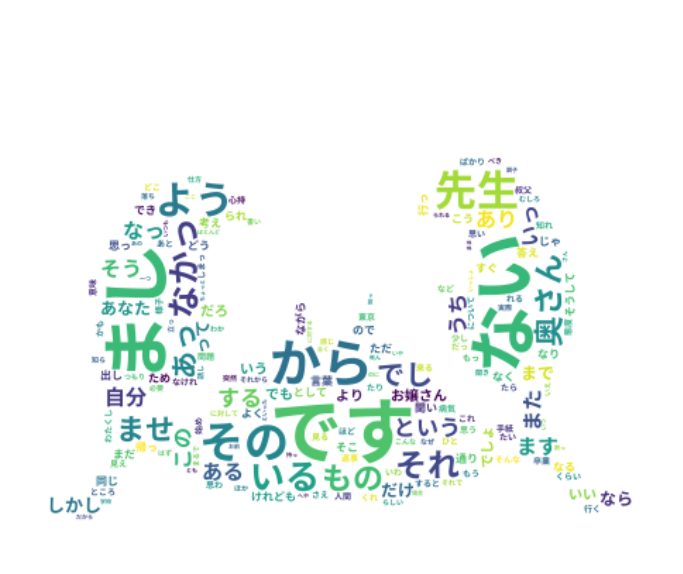

In [15]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
def get_wordcrowd_color_mask( text, img_color):
    
    wc = WordCloud(width=900,
                   height=600,
                   font_path=fpath,
                   background_color="white",
                   mask=img_color,
                   collocations=False, # 単語の重複しないように
                  ).generate( text )

    image_colors = ImageColorGenerator(img_color)

    # show
    plt.figure(figsize=(12,12))
    plt.imshow(wc, # 元画像の色を使う
               interpolation="bilinear")
    plt.axis("off")
    plt.show()
img_color = np.array(Image.open( './utils/mask1.png' ))
get_wordcrowd_color_mask(words_wakati, img_color)

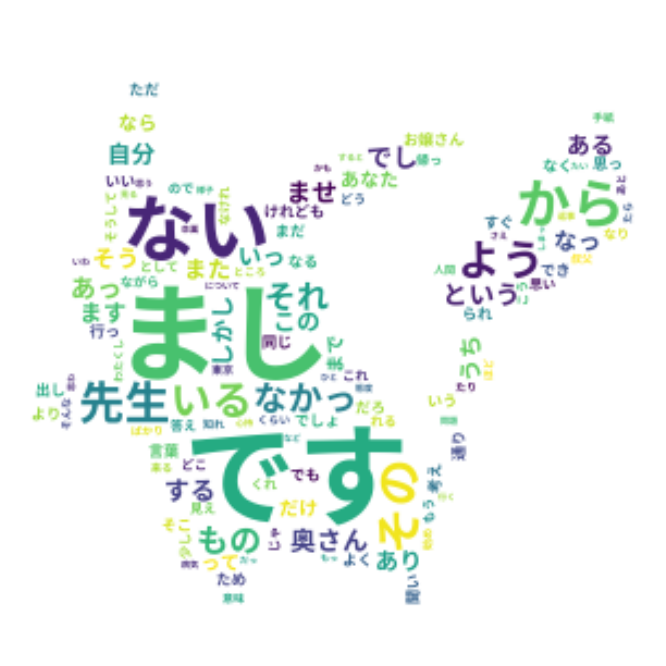

In [16]:
from PIL import Image, ImageOps
# 画像を読み込んだ後、白黒反転した画像を作成
img_color = Image.open('./utils/mask.jpg')
im_invert = ImageOps.invert(img_color)
im_invert = np.array(im_invert)
get_wordcrowd_color_mask(words_wakati, im_invert)

## 自然言語処理における前処理の種類
以下スライド参照<br>
![](./utils/自然言語処理/Slide35.jpg)
![](./utils/自然言語処理/Slide36.jpg)
![](./utils/自然言語処理/Slide37.jpg)
![](./utils/自然言語処理/Slide38.jpg)
![](./utils/自然言語処理/Slide39.jpg)
![](./utils/自然言語処理/Slide40.jpg)
![](./utils/自然言語処理/Slide45.jpg)
![](./utils/自然言語処理/Slide46.jpg)
![](./utils/自然言語処理/Slide47.jpg)
![](./utils/自然言語処理/Slide48.jpg)

## 単語をベクトル化とは？
そもそもベクトルとは「大きさだけでなく、向きももった量」のことです。
単語を「大きさだけでなく、向きももった量」にすると言う意味がよくわからないと思いますが、実際にやっていく実行していくなかで理解してもらいたいと思います。
### 単語ベクトルとは
単語ベクトルとは，単語を数百次元の実数値ベクトルとして表現したものであり，単語間の意味的な関係の強さをそれぞれの単語に対応するベクトルの成す角のコサインやユークリッド距離などを用いて定量化することを目的としています。<br>
要はコンピュータで計算できないもの(単語)を計算できるようにすることを目的にしています。<br>
また、単語ベクトルは単語の分散表現(Distributed Representation，Word Embedding）とも呼ばれ単語に留まらず文を表現させる研究も盛んに行われています。
さまざまな単語ベクトル構成手法の内，昨今，注目されているのがニューラルネットワークに基づく学習手法です。<br>
特に，Google の Mikolov らが提案した手法とそれを実装したツール word2vec2 は，大規模なコーパスで学習させることでベクトル空間内でking − man + woman を計算すると queen に近い値を出すといいたものです。
今回はこれを皆さんに体験してもらおうと思います。

### 単語の分散表現とは？
単語の分散表現のメリットを理解するための比較対象として、単語の one-hot表現 についても説明します。
#### one-hot表現
文字や単語を、記号の世界から数値の世界に変換する手法として用いられるのが、「One-hotベクトル表現」です。One-hotベクトルとは、ベクトルのすべての要素のうちひとつだけが1であり、残りはすべて0であるベクトルを意味します。One-hotベクトル表現の言語処理への応用では、世の中に存在するすべての単語を、（0,0……,0,1,0,……0,0）のベクトルで表現します。これにより、単語とベクトルが一対一の関係になり、プログラムで処理できるようになります。このように、各概念を一対一対応で表現する手法は「局所表現」と呼ばれます。<br>
しかしこの手法では、単語同士が関連していないため、同一単語であるかどうかの判定以外の処理を行うことは難しく、また世界に存在する数多くの言語のすべての単語を網羅するとなると、ベクトル数が膨大になり、計算時間が激増するという問題点がありました。<br>
![](./utils/自然言語処理/Slide50.jpg)
![](./utils/自然言語処理/Slide51.jpg)

#### 分散表現
局所表現による言語処理の計算時間の膨大さという問題点を解決したのが、2000年に提案された、「分散表現」の言語処理への応用である単語分散表現の登場です。

単語分散表現とは、「文字・単語をベクトル空間に埋め込み、その空間上のひとつの点として捉える」ことを指します。単語分散表現は、単語埋め込み（Word Embedding）とも呼ばれます。

局所表現では、ある概念をほかの概念から完全に独立したものとして表現しています。一方、分散表現では、ある概念を表現する際に、ほかの概念との共通点や類似性と紐づけながら、ベクトル空間上に表現します。以下の例のベクトルの各要素は我々が理解できる食べ物に関連した概念ですが、ベクトルの各要素はアルゴリズムが勝手に作り出すものであり、人間に解釈できるものとは限りません。
更に、それぞれの概念同士が関連し合っている故に、分散表現では異なる概念を表現するベクトル同士での計算が可能です。
この分散表現は、人間が新しいことを記憶する際に、既に知っていることと関連させて記憶することや、あらゆる事象はさまざまな特徴で表現されうるといった、認知心理学や神経科学が人間の脳に関して持つ知見を応用し生まれたものです。

![](./utils/自然言語処理/Slide52.jpg)
![](./utils/自然言語処理/Slide53.jpg)

#### なぜ自然言語処理にとって単語の分散表現は重要なのか？
![](./utils/自然言語処理/Slide54.jpg)
![](./utils/自然言語処理/Slide55.jpg)

### 単語のベクトル化 word2vec
![](./utils/自然言語処理/Slide56.jpg)
![](./utils/自然言語処理/Slide57.jpg)
![](./utils/自然言語処理/Slide58.jpg)
![](./utils/自然言語処理/Slide59.jpg)
![](./utils/自然言語処理/Slide60.jpg)
![](./utils/自然言語処理/Slide61.jpg)

### One-hot表現を作ってみる

In [17]:
import janome.tokenizer #形態素解析器(日本語を単語に分割するライブラリ)

# Documents
d_01 = "私は今朝おにぎりを食べました。"
d_02 = "今日の朝はあめでした。犬の散歩には行きませんでした。"
d_03 = "論文を読むのは楽しい。"
d_04 = "あめは美味しい。"

# 分かち書き(Tokenを見出し語に戻す)
tokenizer = janome.tokenizer.Tokenizer()
print([token.base_form for token in tokenizer.tokenize(d_01)])

['私', 'は', '今朝', 'おにぎり', 'を', '食べる', 'ます', 'た', '。']


In [18]:
# Vocabularyを作る
tokens_01 = [token.base_form for token in tokenizer.tokenize(d_01)]
tokens_02 = [token.base_form for token in tokenizer.tokenize(d_02)]
tokens_03 = [token.base_form for token in tokenizer.tokenize(d_03)]
tokens_04 = [token.base_form for token in tokenizer.tokenize(d_04)]
vocabulary = list(set(tokens_01+tokens_02+tokens_03+tokens_04))
print(vocabulary)

['論文', 'は', '朝', 'た', 'の', '。', 'を', '今朝', '私', '今日', 'ん', '犬', '食べる', 'に', '楽しい', 'おにぎり', '散歩', '美味しい', 'あめ', 'です', 'ます', '行く', '読む']


In [19]:
# 単語IDを表示
for i in range(len(vocabulary)):
    print("token ID : {}, token : {}".format(i,vocabulary[i]))

token ID : 0, token : 論文
token ID : 1, token : は
token ID : 2, token : 朝
token ID : 3, token : た
token ID : 4, token : の
token ID : 5, token : 。
token ID : 6, token : を
token ID : 7, token : 今朝
token ID : 8, token : 私
token ID : 9, token : 今日
token ID : 10, token : ん
token ID : 11, token : 犬
token ID : 12, token : 食べる
token ID : 13, token : に
token ID : 14, token : 楽しい
token ID : 15, token : おにぎり
token ID : 16, token : 散歩
token ID : 17, token : 美味しい
token ID : 18, token : あめ
token ID : 19, token : です
token ID : 20, token : ます
token ID : 21, token : 行く
token ID : 22, token : 読む


In [20]:
# One-hot化
import sklearn.preprocessing
vocabulary_onehot = sklearn.preprocessing.label_binarize(vocabulary,classes=vocabulary)

for token, onehotvec in zip(vocabulary,vocabulary_onehot):
    print("one-hot vector : {}, token : {}".format(onehotvec,token))

one-hot vector : [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 論文
one-hot vector : [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : は
one-hot vector : [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 朝
one-hot vector : [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : た
one-hot vector : [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : の
one-hot vector : [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 。
one-hot vector : [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : を
one-hot vector : [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 今朝
one-hot vector : [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 私
one-hot vector : [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0], token : 今日
one-hot vector : [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0], token : ん
one-hot vector : [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0], token : 犬
one-hot vector : [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0], token : 食べる
one-hot

In [21]:
# 任意のOne-hot表現を取り出す
token_index = vocabulary.index("私")
print("「私」のOne-hot表現は {}".format(vocabulary_onehot[token_index]))


「私」のOne-hot表現は [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



今回は分割と見出し語化(「食べ」→「食べる」等)のみ行いました。<br>
実際には以下の様な処理が入ることが有ります。
- クリーニング(htmlタグ除去等)
- 正規化(半角全角、大文字小文字、表記ゆれの統一等)
- ストップワード除去(頻出で意味のない単語。the等)


One-hot表現の問題点① : 次元が大きすぎる

- 上記の例ではCorpusが小さかったので、Vocabularyの大きさも20程度でした。
- 実際の日本語wikipediaコーパスは150万語程度です。
- ある単語が専有するメモリは莫大なものになります。


In [22]:
import sys
# 150万次元のOne-hotベクトルを作ってみて、メモリを確認する
memory_check_list = [0] * 1500000
memory_check_list[0] = 1
memory = sys.getsizeof(memory_check_list)
memory = memory / (1000*1000)
print("ある単語が専有するメモリ : {:0.1f}MB".format(memory))

ある単語が専有するメモリ : 12.0MB


One-hot表現の問題点② : 意味をエンコードできない

- ベクトルは内積やコサイン類似度といった手法で「近さ」を定量化出来ます。
- しかしOne-hot表現では、異なる単語ベクトルの内積・コサイン類似度は0になってしまいます。


In [23]:
inu_vec = vocabulary_onehot[vocabulary.index("犬")]
kesa_vec = vocabulary_onehot[vocabulary.index("今朝")]
asa_vec = vocabulary_onehot[vocabulary.index("朝")]

# 「犬」と「朝」の内積
print("「犬」と「朝」の距離 : {}".format(np.dot(inu_vec,asa_vec)))

# 「今朝」と「朝」の内積
print("「今朝」と「朝」の距離 : {}".format(np.dot(kesa_vec,asa_vec)))

「犬」と「朝」の距離 : 0
「今朝」と「朝」の距離 : 0


もし意味を表現できるようになれば、以下の事ができます。

- 意味の近い単語ほど、ベクトルは近くなる(cos類似度が1に近くなる)。
- 単語の足し引きで他の単語を表現できる。
    -「パリ」ー「フランス」＋「ドイツ」≒「ベルリン」 (首都の意味をエンコード)
    - 「おじさん」ー「男」＋「女」≒「おばさん」 (性別の意味をエンコード)


### カウントベースと推論ベース
単語の分散表現を獲得する手法としては、大きく分けてカウントベースの手法と推論ベースの手法の二つがあります。カウントベースの手法は周囲の単語の頻度によって単語を表現する方法で、コーパス全体の統計データから単語の分散表現を獲得します。一方で、推論ベースの手法はニューラルネットワークを用いて少量の学習サンプルをみながら重みを繰り返し更新する手法です。Word2Vecは後者に該当します。

### word2vec

-「次元が大きすぎる」「意味をエンコードできない」というOne-hot表現の弱点を克服する手法がword2vecです。
- word2vecはCBOWとSkip-gramという2種類に分類出来ます。

|分類 |	意味|
|----|----|
|CBOW |	周辺の単語から、ある単語を予測する|
|Skip-gram| 	ある単語から、周辺の単語を予測する|


「周辺」のサイズはウィンドウサイズと呼び、ハイパーパラメータです。<br>
「ある場所に入る単語の確率分布は、その周辺の単語によって決定される」という分布仮説という考え方があります。<br>
だから「周辺の単語」から「ある単語」を予測する事ができます。(CBOW)<br>
逆も然りです。(Skip-gram)<br>

-   「ある単語」のベクトル表現を、150万次元から300次元に削減しています。
-   この「300次元のベクトル」はスパース(One-hotの様に、多くが0の意味)ではなく、密なベクトルです。
-    このやり方で得られたベクトルは、意味をエンコードできている事が報告されています。<br>
それでは実行してみましょう。

分かち書きには`janome`を使用します。
#### Analyzerモジュール
Analyzerの主な前処理と後処理は以下の通りです。

前処理
文章の抽出、不要な文字列の削除(HTMLタグなど)、文字種の統一(英字は全て英小文字にするなど)、スペルミス・変換ミスなどによる表記ゆらぎの補正などをします。

後処理
分かち書き後の字句(トークン)を対象としており、数字の置換(数字の名詞は全て0に置き換えるなど)、特定の品詞のみの抽出をします。

Analyzerは、以下の3つを組み合わせて使用します。

- 文字の正規化などの前処理を行うCharFilter
- 形態素解析後の後処理を行うTokenFilter
- 分かち書きされたトークン単位で処理するTokenFilter

#### CharFilter
| UnicodeNormalizeCharFilter | Unicodeを正規化することで表記ゆれを吸収する<br> - 引数に’NFC’, ‘NFKC’, ‘NFD’, ‘NFKD’を指定可能<br> - デフォルトは’NFKC’で、全角→半角などの変換が行われる|
| -----|------|

### テキストから単語のリストを作成する方法

In [74]:
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter

main_text = """
Analyzerの主な前処理と後処理は以下の通りです。
前処理
文章の抽出、不要な文字列の削除(HTMLタグなど)、文字種の統一(英字は全て英小文字にするなど)、スペルミス・変換ミスなどによる表記ゆらぎの補正などをします。
後処理
分かち書き後の字句(トークン)を対象としており、数字の置換(数字の名詞は全て0に置き換えるなど)、特定の品詞のみの抽出をします。
Analyzerは、以下の3つを組み合わせて使用します。
""" 

token_filters = [POSKeepFilter(['名詞', '代名詞', "動詞"])]
a = Analyzer(token_filters=token_filters)
# 単語のリストを作成する。
sentences = [tok.surface for tok in a.analyze(main_text)]
sentences

['Analyzer',
 '主',
 '処理',
 '後処理',
 '以下',
 '通り',
 '処理',
 '文章',
 '抽出',
 '不要',
 '文字',
 '列',
 '削除',
 '(',
 'HTML',
 'タグ',
 ')、',
 '文字種',
 '統一',
 '(',
 '英字',
 '全て',
 '英',
 '小文字',
 'する',
 ')、',
 'スペル',
 'ミス',
 '変換',
 'ミス',
 '表記',
 'ゆらぎ',
 '補正',
 'し',
 '後処理',
 '分かち書き',
 '後',
 '字句',
 '(',
 'トー',
 'クン',
 ')',
 '対象',
 'し',
 'おり',
 '数字',
 '置換',
 '(',
 '数字',
 '名詞',
 '全て',
 '0',
 '置き換える',
 ')、',
 '特定',
 '品詞',
 '抽出',
 'し',
 'Analyzer',
 '以下',
 '3',
 '組み合わせ',
 '使用',
 'し']

### モデルの学習
gensimを用いてWord2vecのモデルの作成を行います。下記がモデルを作成するに当たっての主要なパラメータになります。
| パラメータ | 説明 |
|----------|-------|
|sg	| 1ならskip-gramで0ならCBOWで学習する|
|size	| 何次元の分散表現を獲得するかを指定 |
|window	| コンテクストとして認識する前後の単語数を指定|
|min_count	| 指定の数以下の出現回数の単語は無視する|

## データ準備

In [162]:
# 小説を5つ用意
text_list1 = get_url_text("https://www.aozora.gr.jp/cards/000035/files/1567_14913.html")
text_list2 = get_url_text("https://www.aozora.gr.jp/cards/000879/files/43016_16836.html")
text_list3 = get_url_text("https://www.aozora.gr.jp/cards/000888/files/33205_26197.html")
text_list4 = get_url_text("https://www.aozora.gr.jp/cards/000888/files/51164_66323.html")
text_list5 = get_url_text("https://www.aozora.gr.jp/cards/001123/files/42931_35771.html")

In [188]:
# janomeを使ってテキストのリストから単語のりすとを生成
# Janomeのロード
from janome.tokenizer import Tokenizer
# Tokenizerインスタンスの生成 
t = Tokenizer()
# テキストを引数として、形態素解析の結果、名詞・動詞・形容詞(原形)のみを配列で抽出する関数を定義 
def extract_words(sum_list):
    sentences = []
    for text_list in sum_list:
        token_list = []
        for text_line in text_list:
            tokens = t.tokenize(text_line)
            for token in tokens:
                if token.part_of_speech.split(',')[0] in['名詞']:
                    token_list.append(token.base_form)
        sentences.append(token_list)
    return sentences
word_list = extract_words([text_list1, text_list2, text_list3])

In [189]:
from gensim.models.word2vec import Word2Vec

#モデルを作る
model = Word2Vec(word_list, min_count=1, size=30)
#モデルを保存する
model.save('model/kokoro.model')
print('saved at "kokoro.model"')

saved at "kokoro.model"


In [190]:
model = Word2Vec.load("model/kokoro.model") # gensim形式のモデルをロードします

### ボキャブラリを確認

In [191]:
model.wv.vocab

{'メロス': <gensim.models.keyedvectors.Vocab at 0x2118d5bf188>,
 '激怒': <gensim.models.keyedvectors.Vocab at 0x2118d5bfc88>,
 '邪智': <gensim.models.keyedvectors.Vocab at 0x2118d5bfb88>,
 '暴虐': <gensim.models.keyedvectors.Vocab at 0x2118d5bfc48>,
 'ゃちぼうぎゃく': <gensim.models.keyedvectors.Vocab at 0x2118d5bfe88>,
 '王': <gensim.models.keyedvectors.Vocab at 0x2118d5bfdc8>,
 '決意': <gensim.models.keyedvectors.Vocab at 0x2118d5bfd88>,
 '政治': <gensim.models.keyedvectors.Vocab at 0x2118d5bfb48>,
 '村': <gensim.models.keyedvectors.Vocab at 0x2118d5bf708>,
 '牧人': <gensim.models.keyedvectors.Vocab at 0x2118d5bf748>,
 '笛': <gensim.models.keyedvectors.Vocab at 0x2118d5bf7c8>,
 '羊': <gensim.models.keyedvectors.Vocab at 0x2118d5bfa08>,
 '邪悪': <gensim.models.keyedvectors.Vocab at 0x2118d5bf548>,
 '人一倍': <gensim.models.keyedvectors.Vocab at 0x2118d5bf588>,
 '敏感': <gensim.models.keyedvectors.Vocab at 0x2118d5bf408>,
 'きょう': <gensim.models.keyedvectors.Vocab at 0x2118d5bf448>,
 '未明': <gensim.models.keyedvectors.V

## 単語のベクトルを見る

In [192]:
# 単語のベクトルを見る
model.wv["王"],model.wv["王"].shape

(array([ 0.00666874, -0.02655591, -0.06156563, -0.06872889, -0.11217778,
        -0.17082544,  0.04338928,  0.06854654, -0.05634882,  0.05920975,
        -0.06325503, -0.06752525,  0.18078369, -0.07915374,  0.07642227,
         0.11696416, -0.03348758, -0.13711472,  0.15528458, -0.10116944,
        -0.0241161 , -0.02158193,  0.03992549, -0.05645756,  0.08966302,
         0.05592261, -0.12762943, -0.06977747,  0.2168577 ,  0.06273849],
       dtype=float32),
 (30,))

# ある単語と類似している単語を見る
similar_wordsにはリストになっていて、その要素はtupleとなっている。

In [193]:
# 猫と類似している単語を見る
similar_words = model.wv.most_similar(positive=["王"], topn=9)
print(*[" ".join([v, str("{:.2f}".format(s))]) for v, s in similar_words], sep="\n")

今 1.00
ところ 1.00
人間 1.00
よう 1.00
人 1.00
僕 1.00
日 1.00
それ 0.99
もの 0.99


In [194]:

results = model.wv.most_similar(negative=['王', 'メロス'])
for result in results:
    print(result)

('区切', 0.2922549247741699)
('異端', 0.23880639672279358)
('本人', 0.21319395303726196)
('行い', 0.19466367363929749)
('借り物', 0.187569260597229)
('好意', 0.1537606120109558)
('従弟', 0.1470605731010437)
('定', 0.14625807106494904)
('成長', 0.14529377222061157)
('警告', 0.13281014561653137)


In [195]:
# 分散表現・単語のリストを取得
word_vectors = model.wv.vectors
index2word = model.wv.index2word
# indexを取得
nouns_id = [i for i, n in enumerate(index2word)]

# 単語を抽出
word_vectors = word_vectors[nouns_id]
index2word = [index2word[i] for i in nouns_id]

In [197]:
from tensorboardX import SummaryWriter
import torch
writer = SummaryWriter('./runs')
writer.add_embedding(torch.FloatTensor(word_vectors), metadata=index2word)
writer.close()

## Tensorboardによる可視化

In [136]:
!tensorboard --logdir=./runs

^C


### 単語埋め込みのみを使うシンプルな文章埋め込み

![](utils\swem_01.png)

文章に対する固定次元の分散表現を得る手法としては、doc2vecやSkip-thoughts、テキスト間の含意関係を学習することで分散表現を得るinfersent、最近では強力な言語モデルとなったBERTといった方法があります。これらの手法は、単語ベクトルに加えて文章ベクトルを得るためのニューラルネットワーク自体を、大規模コーパスから学習させる必要があります。

より単純ながらも後続タスクへの精度がでる文章埋め込みの計算方法として、追加学習やパラメータチューニングを必要とせず単語埋め込みだけを利用するSWEM (Simple Word-Embedding-based Methods) という手法があります。

方法
SWEMでは以下の4つの方法が提案されています。
- SWEM-aver：単語の分散表現に対してaverage poolingする
- SWEM-max：単語の分散表現に対してmax poolingする
- SWEM-concat：SWEM-averとSWEM-maxの結果を結合する
- SWEM-hier：n-gramのように固定長のウィンドウでaverage-poolingした結果に対してmax poolingする

これらは基本的に、文章に含まれる単語の分散表現全体に対して、どういう操作で固定時点のベクトルに集約するかといった操作の違いでしかありません。それぞれのaverage poolingやmax poolingは、element-wiseにaverageやmaxを取ります。Out-of-Vocabulary (OOV) な単語に対しては、[-0.01, 0.01]の範囲の一様乱数を用いて初期化します。なお、aver, max, concatに関してはパラメータはありませんが、SWEM-hierはn-gramのウィンドウの幅nを決める必要があります。

ちなみに、結局のところどれが一番いいのかという話ですが、論文中の評価ではタスク/データ依存という結果になっており、一概にどれが良いかは断定できないようです。

In [12]:
import MeCab
class MeCabTokenizer():
    def __init__(self, mecab_args=""):
        self.tagger = MeCab.Tagger(mecab_args)
        self.tagger.parse("")

    def tokenize(self, text):
        return self.tagger.parse(text).strip().split(" ")
tokenizer = MeCabTokenizer("-O wakati")

In [13]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load("model/kokoro.model")

In [25]:
import numpy as np

class SWEM():
    """
    Simple Word-Embeddingbased Models (SWEM)
    https://arxiv.org/abs/1805.09843v1
    """

    def __init__(self, w2v, tokenizer, oov_initialize_range=(-0.01, 0.01)):
        self.w2v = w2v
        self.tokenizer = tokenizer
        self.vocab = set(self.w2v.wv.vocab.keys())
        self.embedding_dim = self.w2v.wv.vector_size
        self.oov_initialize_range = oov_initialize_range

        if self.oov_initialize_range[0] > self.oov_initialize_range[1]:
            raise ValueError("Specify valid initialize range: "
                             f"[{self.oov_initialize_range[0]}, {self.oov_initialize_range[1]}]")

    def get_word_embeddings(self, text):
        np.random.seed(abs(hash(text)) % (10 ** 8))

        vectors = []
        for word in self.tokenizer.tokenize(text):
            if word in self.vocab:
                vectors.append(self.w2v.wv[word])
            else:
                vectors.append(np.random.uniform(self.oov_initialize_range[0],
                                                 self.oov_initialize_range[1],
                                                 self.embedding_dim))
        return np.array(vectors)

    def average_pooling(self, text):
        word_embeddings = self.get_word_embeddings(text)
        return np.mean(word_embeddings, axis=0)

    def max_pooling(self, text):
        word_embeddings = self.get_word_embeddings(text)
        return np.max(word_embeddings, axis=0)

    def concat_average_max_pooling(self, text):
        word_embeddings = self.get_word_embeddings(text)
        return np.r_[np.mean(word_embeddings, axis=0), np.max(word_embeddings, axis=0)]

    def hierarchical_pooling(self, text, n):
        word_embeddings = self.get_word_embeddings(text)

        text_len = word_embeddings.shape[0]
        if n > text_len:
            raise ValueError(f"window size must be less than text length / window_size:{n} text_length:{text_len}")
        window_average_pooling_vec = [np.mean(word_embeddings[i:i + n], axis=0) for i in range(text_len - n + 1)]

        return np.max(window_average_pooling_vec, axis=0)

In [26]:
swem = SWEM(model, tokenizer)

In [29]:
text = "メロスは激怒した"
# SWEM-aver
swem.average_pooling(text)
# SWEM-max
swem.max_pooling(text)
# SWEM-concat
swem.concat_average_max_pooling(text)
# SWEM-hier
swem.hierarchical_pooling(text, n=2)

array([ 0.01740239,  0.00467173,  0.00468411,  0.00182449, -0.00559801,
        0.00601738,  0.03942473,  0.07938815,  0.001332  ,  0.06327808,
       -0.0055727 ,  0.004028  ,  0.19817368,  0.00045112,  0.10696049,
        0.14082498,  0.00745657,  0.00902755,  0.18223785,  0.00955089,
        0.00883863,  0.00757619,  0.03650183,  0.00609387,  0.11258099,
        0.04559575, -0.00173469,  0.01143377,  0.23378519,  0.05813621])

## Spacy+GiNZAを使ったの日本語処理
spaCyは高度な自然言語処理を行うためのライブラリです。
自然言語処理では対象とする言語（日本語や英語）によって必要な処理や複雑度が変わるのですが、spaCyは多言語対応を意識して設計・開発されており、そのアーキテクチャから学べることも多く非常に良くできたライブラリです。

GiNZAは日本語の自然言語処理を行うためのライブラリでリクルートと国語研が共同で開発したライブラリです。
GiNZAはspaCyのAPIを使用して学習されており、spaCyからモデルをロードして使用することができます。

Google ColaboratoryにはspaCyがデフォルトでインストールされています。

In [30]:
!pip install ja-ginza

^C
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sudachidict-core: filename=SudachiDict_core-20211220-py3-none-any.whl size=71565332 sha256=c3c1d39d8424e73176f418a79511e37af422feed781ff20e1bf50c22443a319e
  Stored in directory: c:\users\hideaki\appdata\local\pip\cache\wheels\17\6d\f6\f9451cbfc76ffdf985af12239191ca20721f1da5aba5005eb0
Successfully built sudachidict-core
  Attempting uninstall: smart-open
    Found existing installation: smart-open 4.1.2
    Uninstalling smart-open-4.1.2:
      Successfully uninstalled smart-open-4.1.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.7.3
    Uninstalling pydantic-1.7.3:
      Successfully uninstalled pydantic-1.7.3
  Attempting uninstall: sudachipy
    Found existing installation: SudachiPy 0.4.9
    Uninstalling SudachiPy-0.4.9:
      Successfully uninstalled SudachiPy-0.4.9
  Attempting uninstall: sudachidict-core
    Found existing 

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


ja_ginzaは国語研のデータセットを畳み込みニューラルネットワーク（CNN）で依存関係ラベリングや単語依存構造解析などのタスクを学習させたモデルになります。

In [33]:
import spacy
# Languageクラス 変数名をnlpで宣言するのが一般的（spaCy推奨）
nlp = spacy.load('ja_ginza')

### 単語依存構造の可視化

spaCyではdisplacyモジュールが用意されており、Docクラスの解析結果を可視化（HTML/SVG出力）することができます。<br>
手始めに解析したDocクラスから単語依存構造の可視化してみましょう。

In [34]:
from spacy import displacy
text = '錦織圭選手はテニスが大好きです。'
doc = nlp(text)
# 依存関係の可視化（jupyter=TrueとすることでNotebook上で表示できる）
displacy.render(doc, style="dep", options={"compact":True},  jupyter=True)

### POS(Part-of-speech)タグとは
動詞や形容詞といった品詞のタグのこと
### Universal POS tags
|POS|	意味	|単語例|
|------|---------|--------|
|ADJ|	形容詞	|big, old, green, incomprehensible, first, second, third|
|ADP|	設置詞	|in, to, during|
|ADV|	副詞|	very, well, exactly|
|AUX| 助動詞|	has(done), is(doing), will(do), was(done), got(done), should(do), must(do)|
|CCONJ|	接続詞|	and, or, but|
|DET|	限定詞|	the, a, an, this, that, my, your, a few, a little, one, ten, all, both, another, such, what|
|INTJ|	間投詞|	psst, ouch, bravo, hello, well, you know, execuse me|
|NOUN|	名詞|	girl, cat, tree, air, beauty|
|NUM|	数詞|	0, 1000, 3.14, one, two, seventy-seven, I, II, III, IV, V, MMXIV|
|PART|	助詞|	's, not|
|PRON|	代名詞|	I, you, he, it, they, myself, yourself, who, what, somebody, anything, everybody, nothing|
|PROPN|	固有名詞|	Mary, John, London, NATO, HBO|
|PUNCT|	句読点|	.(ピリオド), ,(カンマ), ()(括弧)|
|SCONJ|	連結詞|	that, if, while|
|SYM|	シンボル|	$, %, §, ©, +, −, ×, ÷, =, <, >, :-)(顔文字), :joy: (絵文字), kei.0324@example.com, http://example.com/|
|VERB|	動詞|	run. eat, runs. ate, runnning, eating|
|X|	その他|	上記品詞に当てはまらない単語|

### 係り受けタグとは
係り受け解析時に使用される、単語や句、節などの関係性を表すタグのことです。
### Dependency Relations

|係り受けタグ|	意味	|例文|
|----------|----------|----------|
|acl	|名詞の節修飾語|	I have a <b>parakeet</b> named cookie .|
|advcl	|副詞節修飾語	|He <b>talked</b> to him in order to secure the account .|
|advmod	|副詞修飾語	|Where do you want to <b>go</b> later ?|
|amod	|形容詞修飾語	|Sam eats red <b>meat</b> .|
|appos	|同格	|<b>Sam</b> , my brother , arrived .|
|aux	|助動詞	|He should <b>leave</b> .|
|case	|格表示	|The office of the <b>Chair</b> .|
|cc	|等位接続詞	|Bill is big and <b>honest</b> .|
|ccomp	|補文	|He <b>says</b> you like to swim .|
|clf	|類別詞	|Take <b>this</b>> CLF bus .|
|compound	|複合名詞	|A phone <b>book</b> .|
|conj	|結合詞	|Bill is <b>big</b> and honest .|
|cop	|連結詞	|Ivan is the best <b>dancer</b> .|
|csubj	|主部	|What she said is <b>interesting</b> .|
|dep	|不明な依存関係	|正確に依存関係を表せない場合に使用する|
|det	|限定詞	|The <b>man</b> is here .|
|discourse	|談話要素	|Iguazu <b>is</b> in Argentina :)|
|dislocated	|転置	|象 は 鼻 が <b>長い</b> 。|
|expl	|嘘辞	|It is <b>clear</b> that we should decline .|
|fixed	|固定複数単語表現	|He cried <b>because</b> of you .|
|flat	|同格複数単語表現	|<b>Mr.</b> Smith|
|goeswith	|1単語分割表現	|They come here <b>with</b> - out legal permission .|
|iobj	|関節目的語	|She <b>gave</b> me a raise .|
|list	|リスト表現	|Long <b>Lines</b> , Silly Rules , Rude Staff , Ok Food .|
|mark	|接続詞	|He says that you <b>like</b> to swim|
|nmod	|名詞修飾語	|The office of the <b>Chair</b> .|
|nsubj	|主語名詞	|There <b>is</b> a ghost in the room .|
|nummod	|数詞修飾語	|Sam spent forty <b>dollars</b> .|
|obj	|目的語	|She <b>gave</b> me a raise .|
|obl	|斜格名詞	|<b>Give</b> the toys to the children .|
|orphan	|独立関係	|Marie won gold and <b>Peter</b> bronze|
|parataxis	|並列	|The guy , John said , <b>left</b> early in the morning .|
|punct	|句読点	|We have apples , <b>pears</b> , <b>oranges</b> , and <b>bananas</b> .|
|reparandum	|単語として認識されない単語表現	|Go to the righ- to the <b>left</b> .|
|root	|文の根(ROOTは人為的に付加される)	|<b>ROOT</b> I love French fries .|
|vocative	|発声関係	|Guys , <b>take</b> it easy!|
|xcomp	|補体	|Sue <b>asked</b> George to respond to her offer .|

※ 例文では係り受け元を 太字 、係り受け先を 斜字 にしています。

### エンティティ抽出
エンティティとは実世界のオブジェクトを指す単語のことです。
spaCyでは先ほどの依存構造の可視化と同様にdisplacyモジュールを使って、テキスト中に含まれるエンティティをハイライトして表示することができます。
（styleの引数をentにするだけです。）

In [35]:
# エンティティの可視化（jupyter=TrueとすることでNotebook上で表示できる）
displacy.render(doc, style="ent", options={"compact":True},  jupyter=True)

In [36]:
for ent in doc.ents:
  print(ent.text, type(ent))

錦織圭 <class 'spacy.tokens.span.Span'>
選手 <class 'spacy.tokens.span.Span'>
テニス <class 'spacy.tokens.span.Span'>


In [37]:
for ent in doc.ents:
  for token in ent:
    print(token.text, type(token))

錦織 <class 'spacy.tokens.token.Token'>
圭 <class 'spacy.tokens.token.Token'>
選手 <class 'spacy.tokens.token.Token'>
テニス <class 'spacy.tokens.token.Token'>


### 名詞句の抽出
文に含まれる名詞を把握するだけで、なんとなくでも内容を把握することができるので、テキスト文の内容把握したいようなユースケースでは、自然言語処理によってテキスト文から名詞だけを抽出するという操作がよく行われます。

spaCyではこのようなユースケースに応えるように名詞句を簡単に抽出できます。
"句"は"単語"よりも上位の概念です。
文の中で品詞の役割を果たす単位が"句"になります。

先ほどの文章とは別のテキスト文「錦織圭選手は偉大なテニス選手です。」で考えます。

spaCyではDocクラスを生成した段階で名詞句を抽出しnoun_chunksプロパティに保持しています。

In [38]:
doc2 = nlp('錦織圭選手は偉大なテニス選手です。')

# noun_chunksでテキスト文に含まれる名詞句を取り出す
for chunk in doc2.noun_chunks:
  print(chunk.text, type(chunk))

錦織圭選手 <class 'spacy.tokens.span.Span'>
偉大なテニス選手 <class 'spacy.tokens.span.Span'>


In [39]:
# 品詞タグから名詞の単語を抽出する
for token in doc2:
  if token.pos_ in ['NOUN', 'PROPN']: # NOUNが名詞、PROPNが固有名詞
    print(token.text, token.tag_, type(token))

錦織 名詞-固有名詞-人名-姓 <class 'spacy.tokens.token.Token'>
圭 名詞-固有名詞-人名-名 <class 'spacy.tokens.token.Token'>
選手 名詞-普通名詞-一般 <class 'spacy.tokens.token.Token'>
テニス 名詞-普通名詞-一般 <class 'spacy.tokens.token.Token'>
選手 名詞-普通名詞-一般 <class 'spacy.tokens.token.Token'>
